In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = pd.read_csv('filtered_erg_data_with_targets(2).csv')

# Preprocessing
# Handle missing values
data.fillna(data.mean(), inplace=True)

# Normalize features
features = data[['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Target variable
targets = data[['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD', 'MDD']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(y_train.shape[1], activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Predicting conditions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to classes

# You can analyze the conditions based on predicted probabilities and model weights

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1726 - loss: 0.6795 - val_accuracy: 0.5607 - val_loss: 0.5650
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5071 - loss: 0.5508 - val_accuracy: 0.6449 - val_loss: 0.4508
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5670 - loss: 0.4447 - val_accuracy: 0.6449 - val_loss: 0.3449
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5896 - loss: 0.3573 - val_accuracy: 0.6822 - val_loss: 0.2618
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5950 - loss: 0.2823 - val_accuracy: 0.7009 - val_loss: 0.2084
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5958 - loss: 0.2410 - val_accuracy: 0.7103 - val_loss: 0.1797
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6020 - loss: 0.2192 - val_accuracy: 0.7103 - val_loss: 0.1635
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6252 - loss: 0.1726 - val_accuracy: 0.7290 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted probabilities for mental disorders: [[1.2879271e-06 9.9989265e-01 7.8848365e-11 1.0000000e+00 1.9484214e-10
  9.9999863e-01 3.2420428e-07]]
Predicted classes for mental disorders: [[0 1 0 1 0 1 0]]


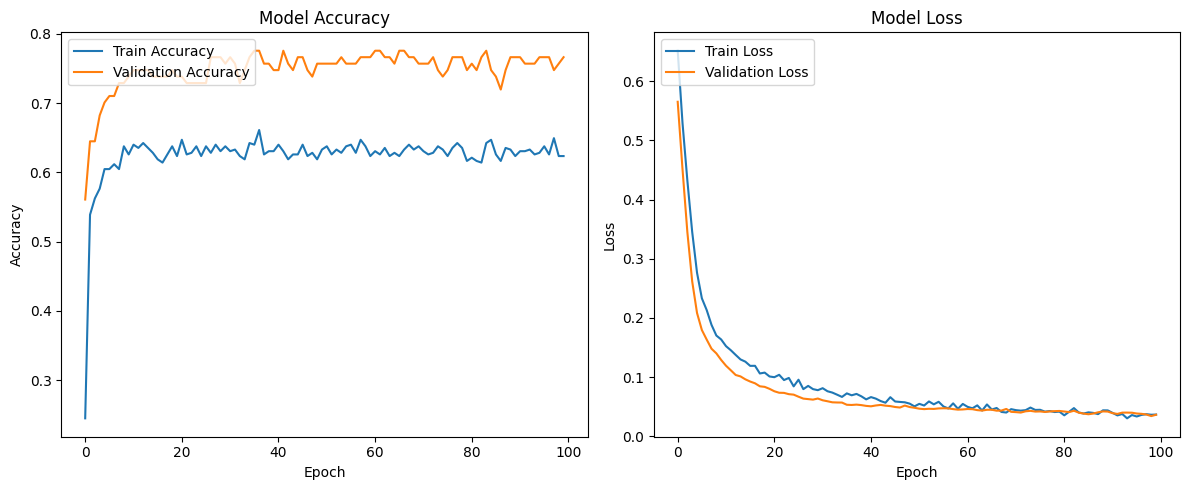

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


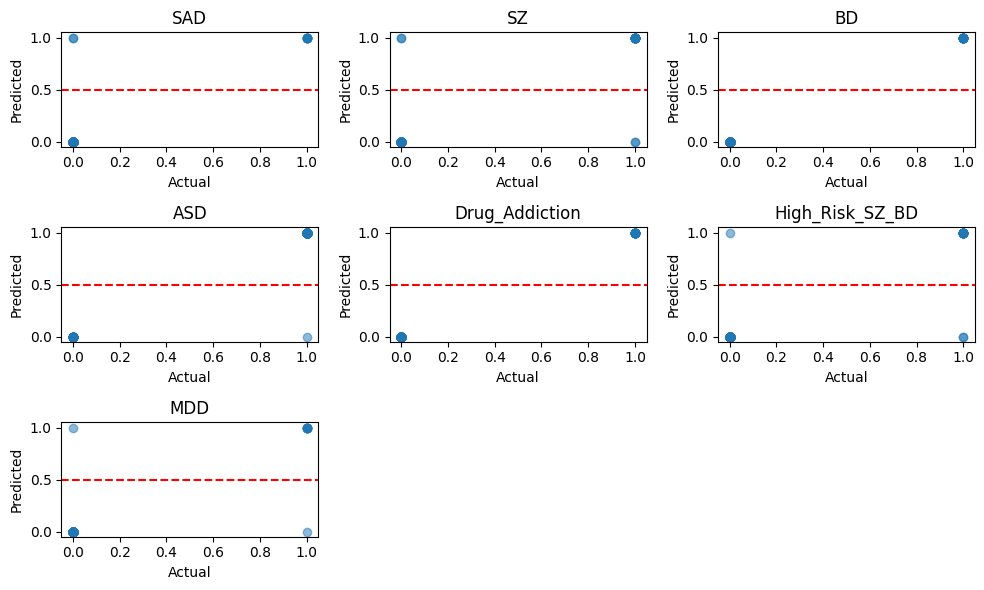

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Predicting with new input values
# Example new input values (no nulls)
new_input = np.array([[12.5, -4.0, 30.0, 20.0, 1.0, 15.0, 25, 1]])  # Replace with actual values
new_input_scaled = scaler.transform(new_input)  # Scale the new input
predictions = model.predict(new_input_scaled)

# Output predictions
print("Predicted probabilities for mental disorders:", predictions)

# Convert probabilities to classes
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted classes for mental disorders:", predicted_classes)

# Data Visualization
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate predictions on the test set
test_predictions = model.predict(X_test)
test_pred_classes = (test_predictions > 0.5).astype(int)

# Visualizing predictions vs actual
plt.figure(figsize=(10, 6))
for i, disorder in enumerate(targets.columns):
    plt.subplot(3, 3, i + 1)
    plt.scatter(y_test[disorder], test_pred_classes[:, i], alpha=0.5)
    plt.title(disorder)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.axhline(0.5, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# Predicting with new input values
# Example new input values (no nulls)
new_input = np.array([[12.5, -4.0, 30.0, 20.0, 1.0, 15.0, 25, 1]])  # Replace with actual values
new_input_scaled = scaler.transform(new_input)  # Scale the new input
predictions = model.predict(new_input_scaled)

# Output predictions
print("Predicted probabilities for mental disorders:", predictions)

# Convert probabilities to classes
predicted_classes = (predictions > 0.5).astype(int)
print("Predicted classes for mental disorders:", predicted_classes)

# Determine the mental disorder with the highest probability
disorder_labels = targets.columns
highest_probability_index = np.argmax(predictions)  # Get index of highest probability
highest_probability_value = predictions[0][highest_probability_index]  # Get the highest probability
highest_disorder = disorder_labels[highest_probability_index]  # Get the corresponding disorder label

# Display the result
print(f"The mental disorder with the highest predicted probability is '{highest_disorder}' with a probability of {highest_probability_value:.2f}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted probabilities for mental disorders: [[1.2879271e-06 9.9989265e-01 7.8848365e-11 1.0000000e+00 1.9484214e-10
  9.9999863e-01 3.2420428e-07]]
Predicted classes for mental disorders: [[0 1 0 1 0 1 0]]
The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.


In [ ]:
# List of new input scenarios
input_scenarios = [
    np.array([[10.0, -6.0, 25.0, 15.0, 1.0, 10.0, 23, 0]]),  # Scenario 1: SAD
    np.array([[11.5, -3.0, 29.0, 20.0, 2.0, 12.0, 28, 1]]),  # Scenario 2: SZ
    np.array([[12.5, -4.5, 35.0, 22.0, 0.8, 14.0, 32, 1]]),  # Scenario 3: BD
    np.array([[14.0, -5.5, 27.0, 18.0, 1.5, 8.0, 40, 0]]),   # Scenario 4: MDD
    np.array([[13.0, -2.0, 30.0, 28.0, 1.0, 15.0, 26, 1]])   # Scenario 5: High Risk SZ/BD
]

# Predicting for each input scenario
for i, new_input in enumerate(input_scenarios):
    new_input_scaled = scaler.transform(new_input)  # Scale the new input
    predictions = model.predict(new_input_scaled)

    # Determine the mental disorder with the highest probability
    disorder_labels = targets.columns
    highest_probability_index = np.argmax(predictions)  # Get index of highest probability
    highest_probability_value = predictions[0][highest_probability_index]  # Get the highest probability
    highest_disorder = disorder_labels[highest_probability_index]  # Get the corresponding disorder label

    # Display the result
    print(f"Scenario {i + 1}: The mental disorder with the highest predicted probability is '{highest_disorder}' with a probability of {highest_probability_value:.2f}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Scenario 1: The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Scenario 2: The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Scenario 3: The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Scenario 4: The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Scenario 5: The mental disorder with the highest predicted probability is 'ASD' with a probability of 1.00.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


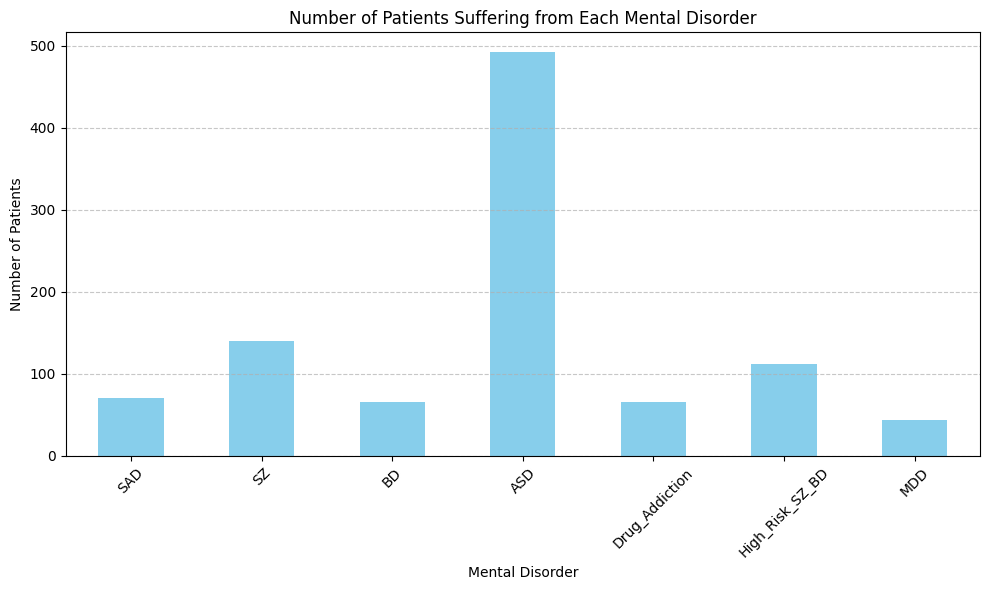

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('filtered_erg_data_with_targets(2).csv')

# Count the number of patients for each mental disorder
disorder_counts = data[['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD', 'MDD']].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
disorder_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Patients Suffering from Each Mental Disorder')
plt.xlabel('Mental Disorder')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

                  SAD          SZ          BD         ASD  Drug_Addiction  \
a_time      13.484533   12.594675   12.360779   11.895644       12.360779   
a_amp      -52.892925  -30.587758  -19.586845  -15.698446      -19.586845   
b_time      65.620804   72.072518   42.158274   39.204903       42.158274   
b_amp       85.360294   51.354107   42.976812   39.826829       42.976812   
OP_s_Amp    60.253866   56.367586   57.171043   56.854444       57.171043   
OP_s_Time  148.739572  147.423334  148.054847  147.587673      148.054847   
age         24.904225   15.747143   25.113636   12.527846       25.113636   
sex          0.267606    0.535714    0.303030    0.668699        0.303030   

           High_Risk_SZ_BD         MDD  
a_time           12.580346   11.730101  
a_amp           -28.172364   -6.637526  
b_time           79.735722   29.602910  
b_amp            47.079349   20.698527  
OP_s_Amp         55.762569   57.176260  
OP_s_Time       146.879794  147.796311  
age              12

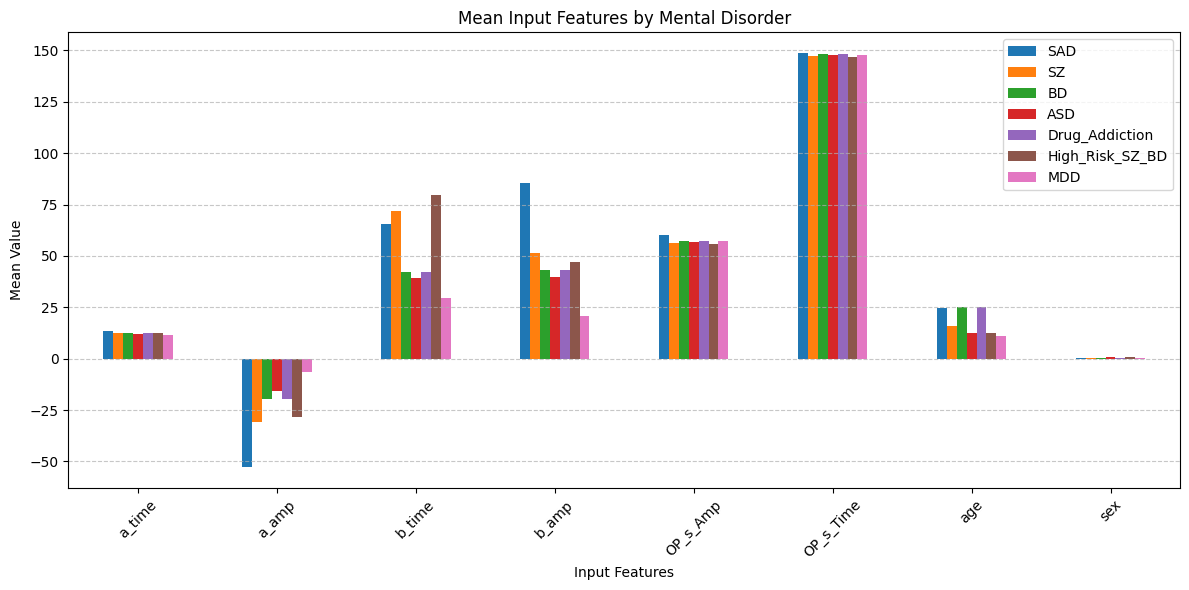

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('filtered_erg_data_with_targets(2).csv')

# Initialize a dictionary to hold summaries for each mental disorder
disorder_feature_summary = {}

# List of mental disorders
disorders = ['SAD', 'SZ', 'BD', 'ASD', 'Drug_Addiction', 'High_Risk_SZ_BD', 'MDD']

# Loop through each disorder to analyze input features
for disorder in disorders:
    # Filter the dataset for patients with the current disorder
    filtered_data = data[data[disorder] == 1]  # Assuming 1 indicates presence of the disorder

    # Calculate the mean of input features for this disorder
    mean_values = filtered_data[['a_time', 'a_amp', 'b_time', 'b_amp', 'OP_s_Amp', 'OP_s_Time', 'age', 'sex']].mean()

    # Store the summary in the dictionary
    disorder_feature_summary[disorder] = mean_values

# Convert the summary to a DataFrame for better visualization
summary_df = pd.DataFrame(disorder_feature_summary)

# Display the summary DataFrame
print(summary_df)

# Optionally, you can visualize the feature means for each disorder
summary_df.plot(kind='bar', figsize=(12, 6), title='Mean Input Features by Mental Disorder')
plt.ylabel('Mean Value')
plt.xlabel('Input Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()